In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../venv/updated_pollution_dataset_2.csv')

In [3]:
df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
1         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
2         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
3         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
4         29.4      93.8   10.3  22.7  45.1  11.8  2.03   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                           11.1                 551        Good  
1                           12.7                 303        Good  
2                            3.1                 674        Poor  
3                            4.6                 735        Poor  
4                            5.4                 486        Poor

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4250 non-null   float64
 1   Humidity                       4250 non-null   float64
 2   PM2.5                          4250 non-null   float64
 3   PM10                           4250 non-null   float64
 4   NO2                            4250 non-null   float64
 5   SO2                            4250 non-null   float64
 6   CO                             4250 non-null   float64
 7   Proximity_to_Industrial_Areas  4250 non-null   float64
 8   Population_Density             4250 non-null   int64  
 9   Air Quality                    4250 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 332.2+ KB


In [5]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  4250.000000  4250.000000  4250.000000  4250.000000  4250.000000   
mean     30.021671    69.935576    20.057929    30.151482    26.399671   
std       7.079486    16.402863    25.140063    28.294709     9.415399   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      24.700000    57.800000     4.500000    11.700000    19.500000   
50%      28.700000    69.600000    11.600000    21.200000    25.000000   
75%      34.500000    80.200000    25.600000    37.800000    32.500000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  4250.000000  4250.000000                    4250.000000   
mean     10.004471     1.500428                       8.684212   
std       7.111211     0.586232                       3.778317   
min      -6.200000     0.650000                       2.500000   
25%       4.900000     1.010000                       5.225000   
50%       7.500000     1.310000                       9.700000   
75%      14.175000     1.930000                      11.300000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         4250.000000  
mean           497.283059  
std            158.671435  
min            188.000000  
25%            376.000000  
50%            494.000000  
75%            601.000000  
max            957.000000

In [6]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [7]:
#Checking for null values
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [8]:
#checking for unique values
df.nunique()

Temperature                      362
Humidity                         722
PM2.5                            777
PM10                             915
NO2                              445
SO2                              346
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        2
dtype: int64

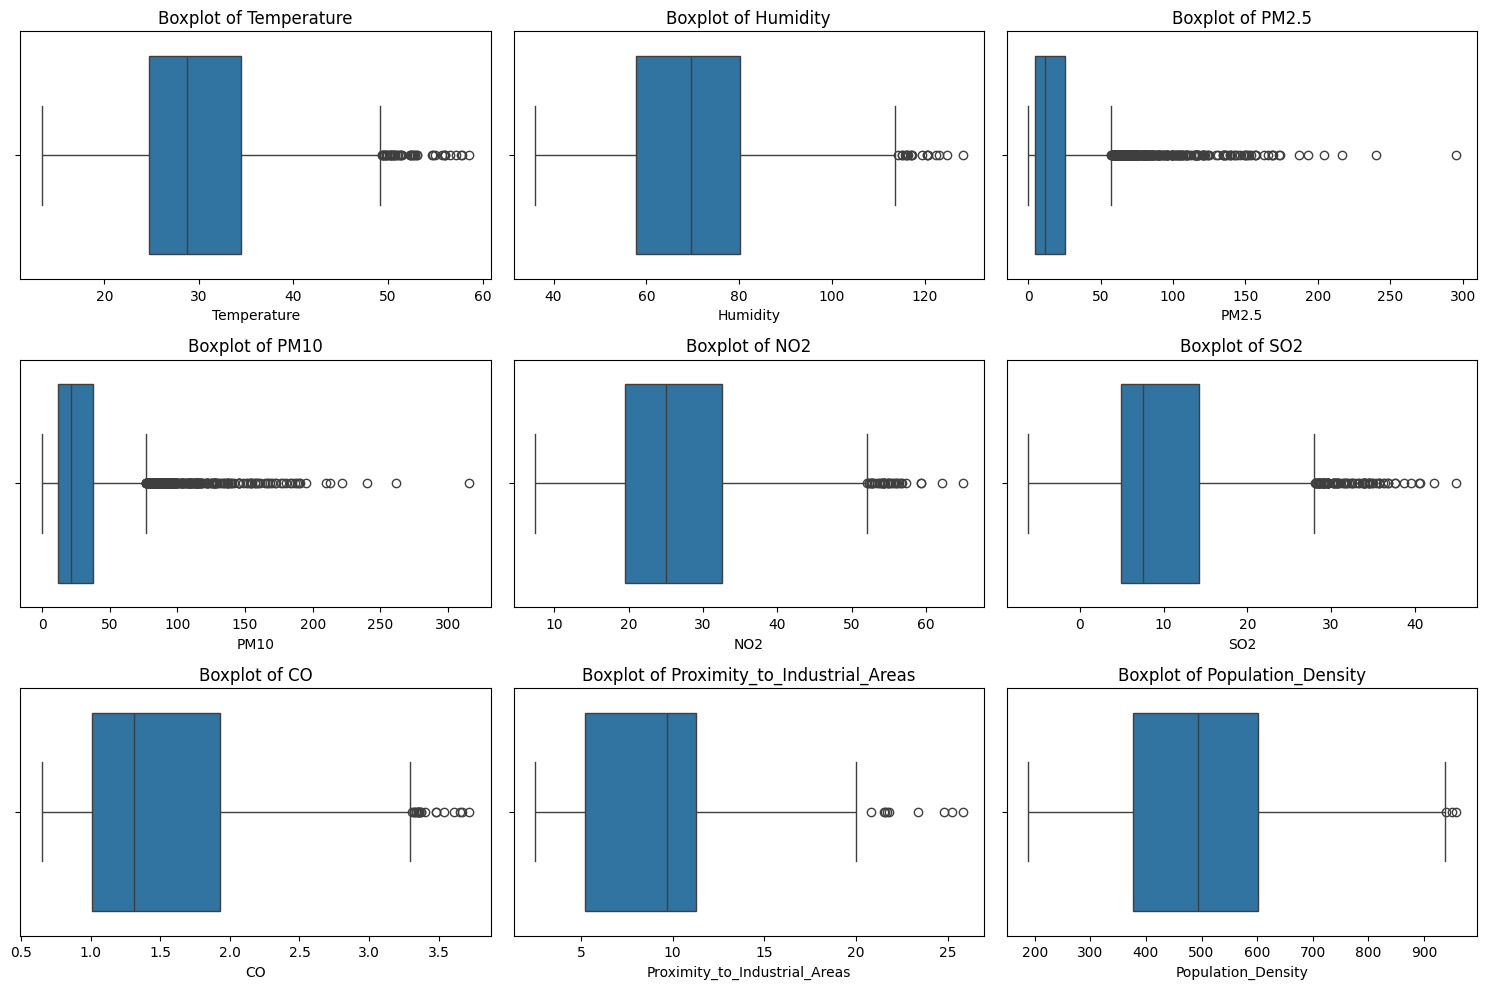

In [9]:
#Boxplot
fig, axes = plt.subplots(3, 3, figsize=(15,10))
axes = axes.flatten()
for i, column in enumerate(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [10]:
#calculating Zscores
from scipy.stats import zscore

zscores = df[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']].apply(zscore)
print(zscores.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0    -0.412744 -1.880111 -0.555272 -0.843065 -1.370222 -0.661635 -0.597834   
1    -0.497506  0.046609 -0.523446 -0.500205 -0.477962 -0.619443 -0.836676   
2     1.324875  1.625787 -0.217126  0.189051  1.752689  1.110424  0.545193   
3     1.649795  0.766080 -0.730312 -0.507274  0.499276  0.379098  0.511072   
4    -0.087823  1.455065 -0.388188 -0.263383  1.986377  0.252522  0.903455   

   Proximity_to_Industrial_Areas  Population_Density  
0                       0.639457            0.338582  
1                       1.062976           -1.224580  
2                      -1.478137            1.113860  
3                      -1.081088            1.498347  
4                      -0.869328           -0.071118  


In [11]:
zscores.shape

(4250, 9)

#removing outliers with zscores > 3
for column in ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']:
    df = df[(np.abs(zscore(df[column]))<3)] 

In [12]:
from scipy.stats import zscore
for column in ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO']: #'PM2.5', 'PM10', 'SO2'

    print(f"{column} percentile values: ", df[column].quantile([0.001, 0.01, 0.05, 0.9, 0.95, 0.99,0.999, 0.9999]))
    min_thresh, max_thresh = df[column].quantile([0.005,0.995])
    print(f"Min threshold : {min_thresh} and Max threshold : {max_thresh}")

    if column in ['PM10', 'SO2', 'PM2.5']:
        df = df[(df[column] >= min_thresh)]

    df = df[(df[column] <= max_thresh)]   

Temperature percentile values:  0.0010    15.42490
0.0100    18.00000
0.0500    20.70000
0.9000    40.10000
0.9500    43.35500
0.9900    49.60000
0.9990    56.37550
0.9999    58.26008
Name: Temperature, dtype: float64
Min threshold : 17.249 and Max threshold : 51.47550000000001
Humidity percentile values:  0.0010     38.20000
0.0100     40.00000
0.0500     44.50000
0.9000     92.40000
0.9500     99.10000
0.9900    109.77300
0.9990    120.65460
0.9999    126.66282
Name: Humidity, dtype: float64
Min threshold : 39.1 and Max threshold : 112.48649999999998
PM2.5 percentile values:  0.0010      0.0000
0.0100      0.1050
0.0500      0.8000
0.9000     48.2500
0.9500     68.4750
0.9900    117.7800
0.9990    173.7565
0.9999    230.3444
Name: PM2.5, dtype: float64
Min threshold : 0.1 and Max threshold : 142.23750000000092
PM10 percentile values:  0.0010      1.0495
0.0100      3.5650
0.0500      5.7000
0.9000     62.2500
0.9500     82.5500
0.9900    122.2700
0.9990    154.3680
0.9999    158.9837

In [13]:
df.shape

(4040, 10)

In [14]:
df[df['SO2'] < 0]

Temperature  Humidity  PM2.5  PM10   NO2  SO2    CO  \
1038         36.0      89.8   33.0  47.9  26.0 -0.1  1.74   
1416         21.5      61.4    4.2  10.4  22.1 -0.1  0.95   
2623         25.6      73.6    4.9   9.3  23.1 -0.1  1.08   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
1038                            4.3                 490        Poor  
1416                           10.9                 447        Good  
2623                           18.8                 547        Good

In [15]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  4040.000000  4040.000000  4040.000000  4040.000000  4040.000000   
mean     29.653614    69.216757    18.286411    28.126139    25.900916   
std       6.722923    15.864548    20.260521    23.297102     8.975592   
min      13.400000    36.000000     0.100000     2.600000     7.400000   
25%      24.600000    57.300000     4.500000    11.600000    19.275000   
50%      28.400000    69.000000    11.200000    20.700000    24.600000   
75%      34.000000    79.400000    24.300000    36.200000    31.900000   
max      51.400000   112.400000   124.500000   136.400000    54.100000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  4040.000000  4040.000000                    4040.000000   
mean      9.681163     1.465072                       8.809827   
std       6.635946     0.549773                       3.730546   
min      -0.100000     0.650000                       2.500000   
25%       4.800000     1.010000                       5.400000   
50%       7.300000     1.260000                      10.000000   
75%      13.600000     1.870000                      11.300000   
max      33.900000     3.150000                      25.800000   

       Population_Density  
count         4040.000000  
mean           490.988366  
std            155.917020  
min            188.000000  
25%            372.000000  
50%            488.000000  
75%            594.000000  
max            957.000000

In [16]:
#MinMax Normalisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
features = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
df[features] = scaler.fit_transform(df[features])

In [17]:
df[features].head()

Temperature  Humidity     PM2.5      PM10       NO2       SO2     CO  \
0     0.360526  0.040576  0.048232  0.027653  0.130621  0.158824  0.200   
1     0.344737  0.454188  0.054662  0.100149  0.310493  0.167647  0.144   
2     0.684211  0.793194  0.116559  0.245889  0.760171  0.529412  0.468   
3     0.744737  0.608639  0.012862  0.098655  0.507495  0.376471  0.460   
4     0.421053  0.756545  0.081994  0.150224  0.807281  0.350000  0.552   

   Proximity_to_Industrial_Areas  Population_Density  
0                       0.369099            0.472042  
1                       0.437768            0.149545  
2                       0.025751            0.631990  
3                       0.090129            0.711313  
4                       0.124464            0.387516

In [18]:
#Mapping Target Column i.e Good = 1, Poor = 0
if df['Air Quality'].dtype == 'object':
    df['Air Quality'] = df['Air Quality'].map({'Good' : 1, 'Poor': 0})

In [19]:
df.head()

Temperature  Humidity     PM2.5      PM10       NO2       SO2     CO  \
0     0.360526  0.040576  0.048232  0.027653  0.130621  0.158824  0.200   
1     0.344737  0.454188  0.054662  0.100149  0.310493  0.167647  0.144   
2     0.684211  0.793194  0.116559  0.245889  0.760171  0.529412  0.468   
3     0.744737  0.608639  0.012862  0.098655  0.507495  0.376471  0.460   
4     0.421053  0.756545  0.081994  0.150224  0.807281  0.350000  0.552   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                       0.369099            0.472042            1  
1                       0.437768            0.149545            1  
2                       0.025751            0.631990            0  
3                       0.090129            0.711313            0  
4                       0.124464            0.387516            0

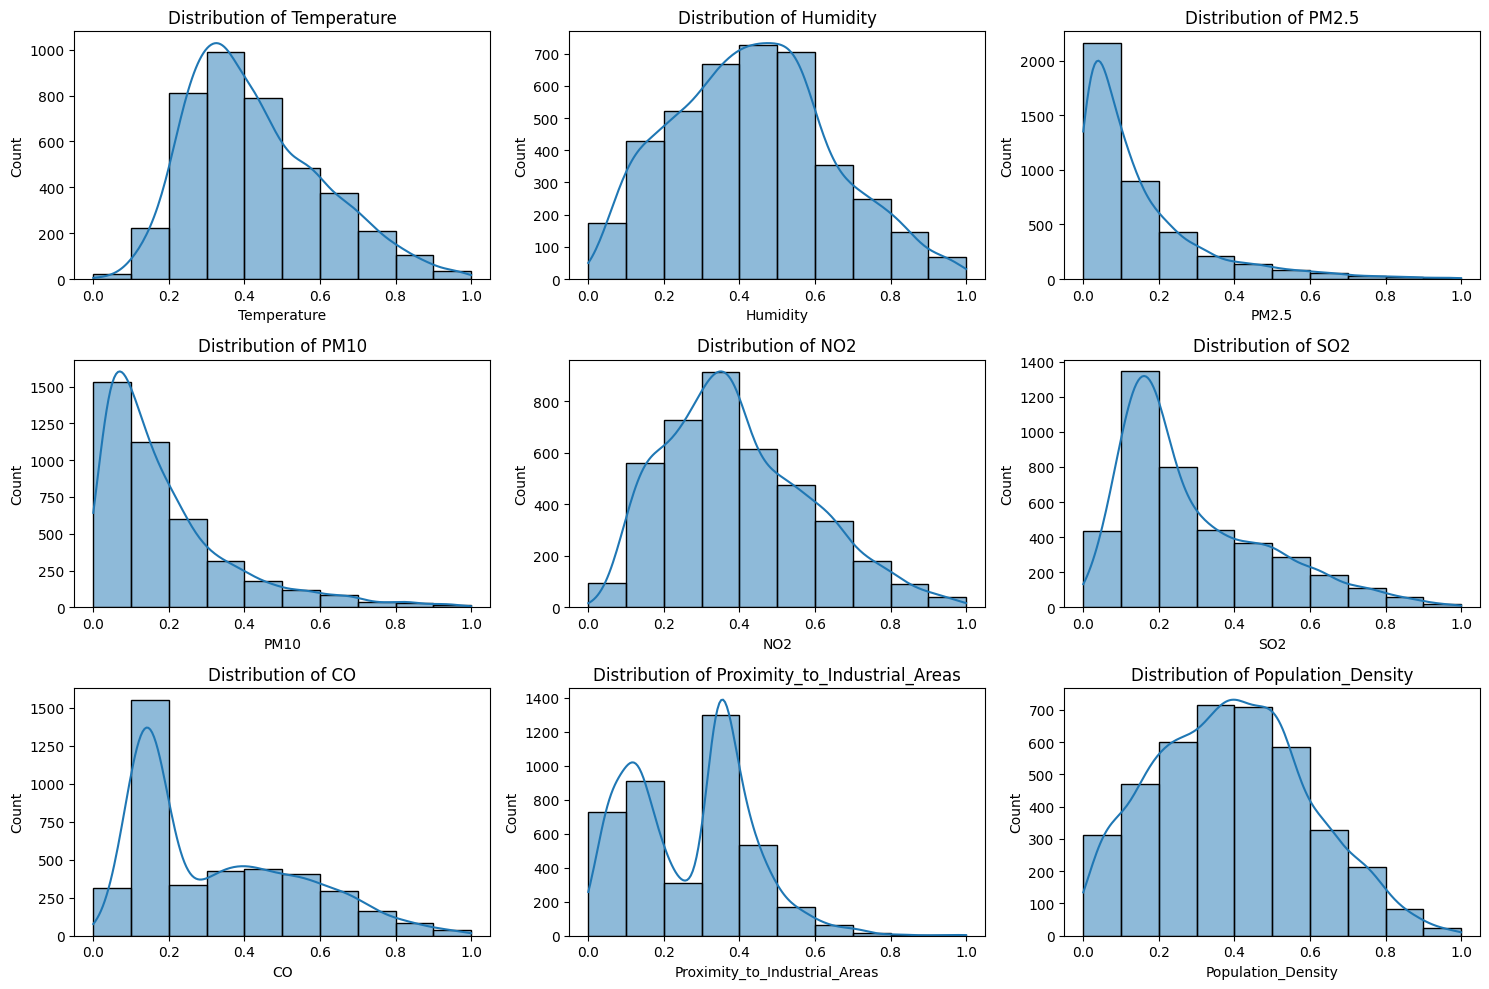

In [20]:
#Histograms of each feature
fig, axes = plt.subplots(3, 3, figsize=(15,10))
axes = axes.flatten()
for i, column in enumerate(features):
    sns.histplot(x=df[column], ax = axes[i], kde=True, bins=10)
    axes[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

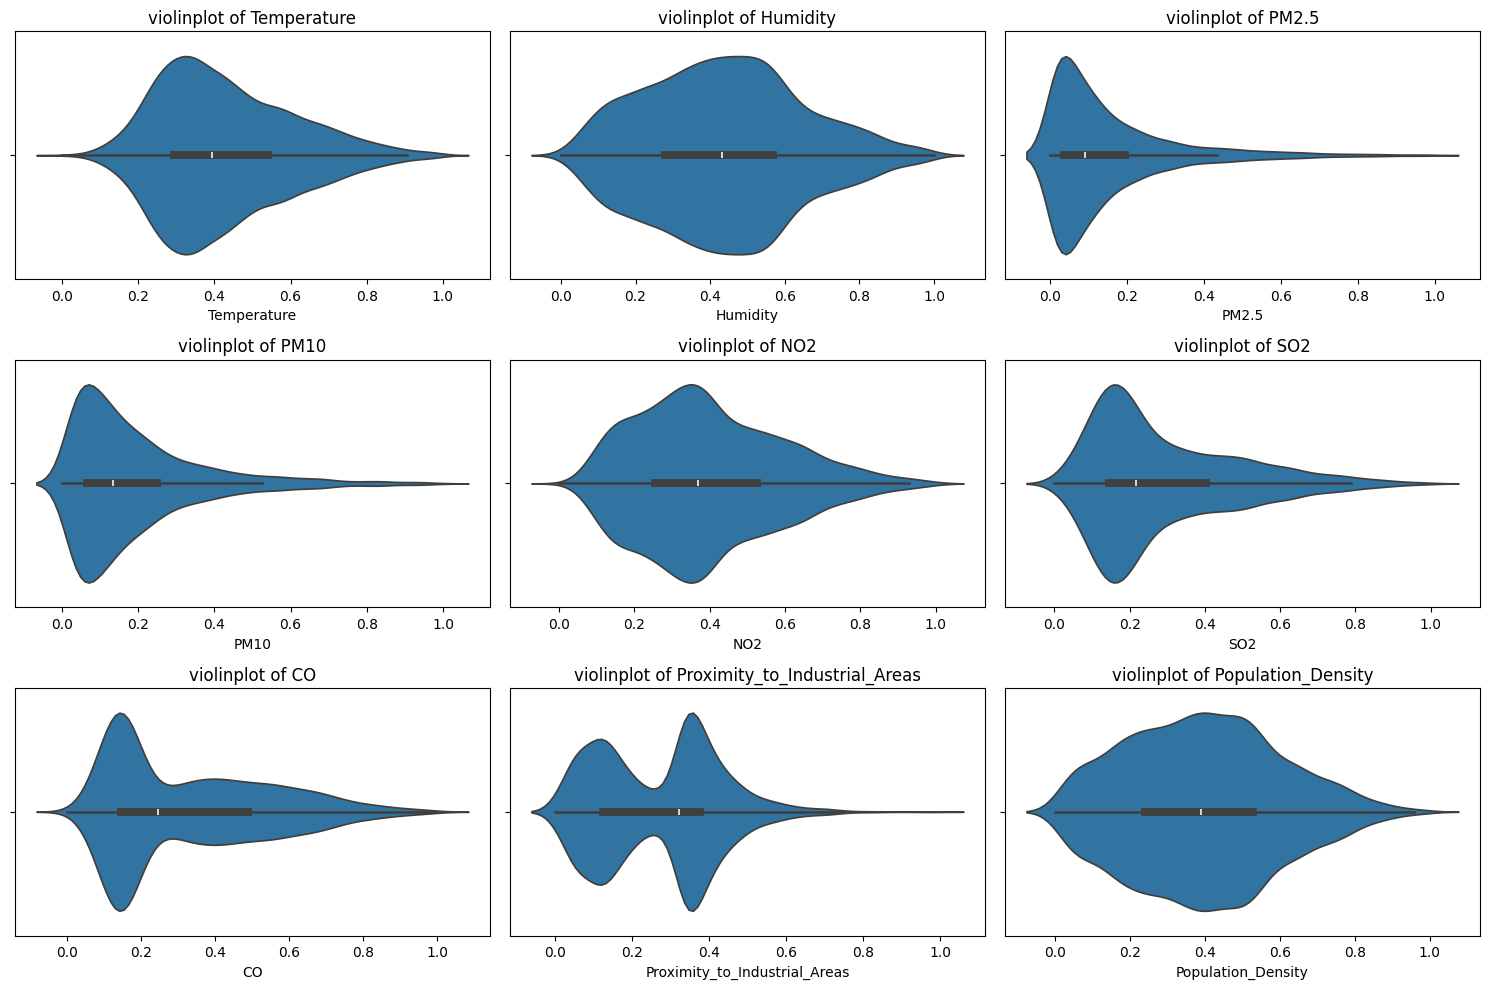

In [21]:
#Violin plots of each feature
fig, axes = plt.subplots(3, 3, figsize=(15,10))
axes = axes.flatten()
for i, column in enumerate(features):
    sns.violinplot(x=df[column], ax = axes[i])
    axes[i].set_title(f'violinplot of {column}')
plt.tight_layout()
plt.show()

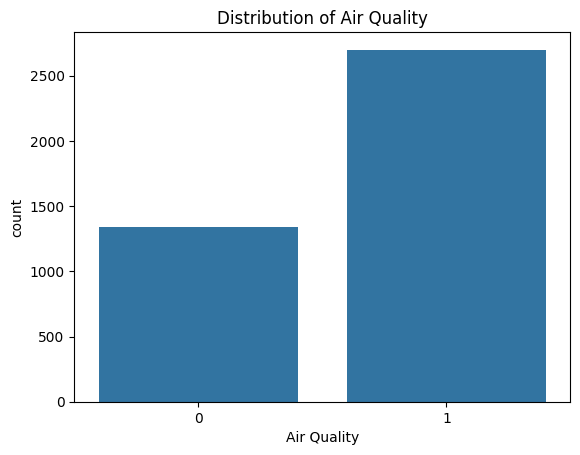

In [22]:
#Target variable distribution
sns.countplot(x = 'Air Quality', data =df)
plt.title("Distribution of Air Quality")
plt.show()

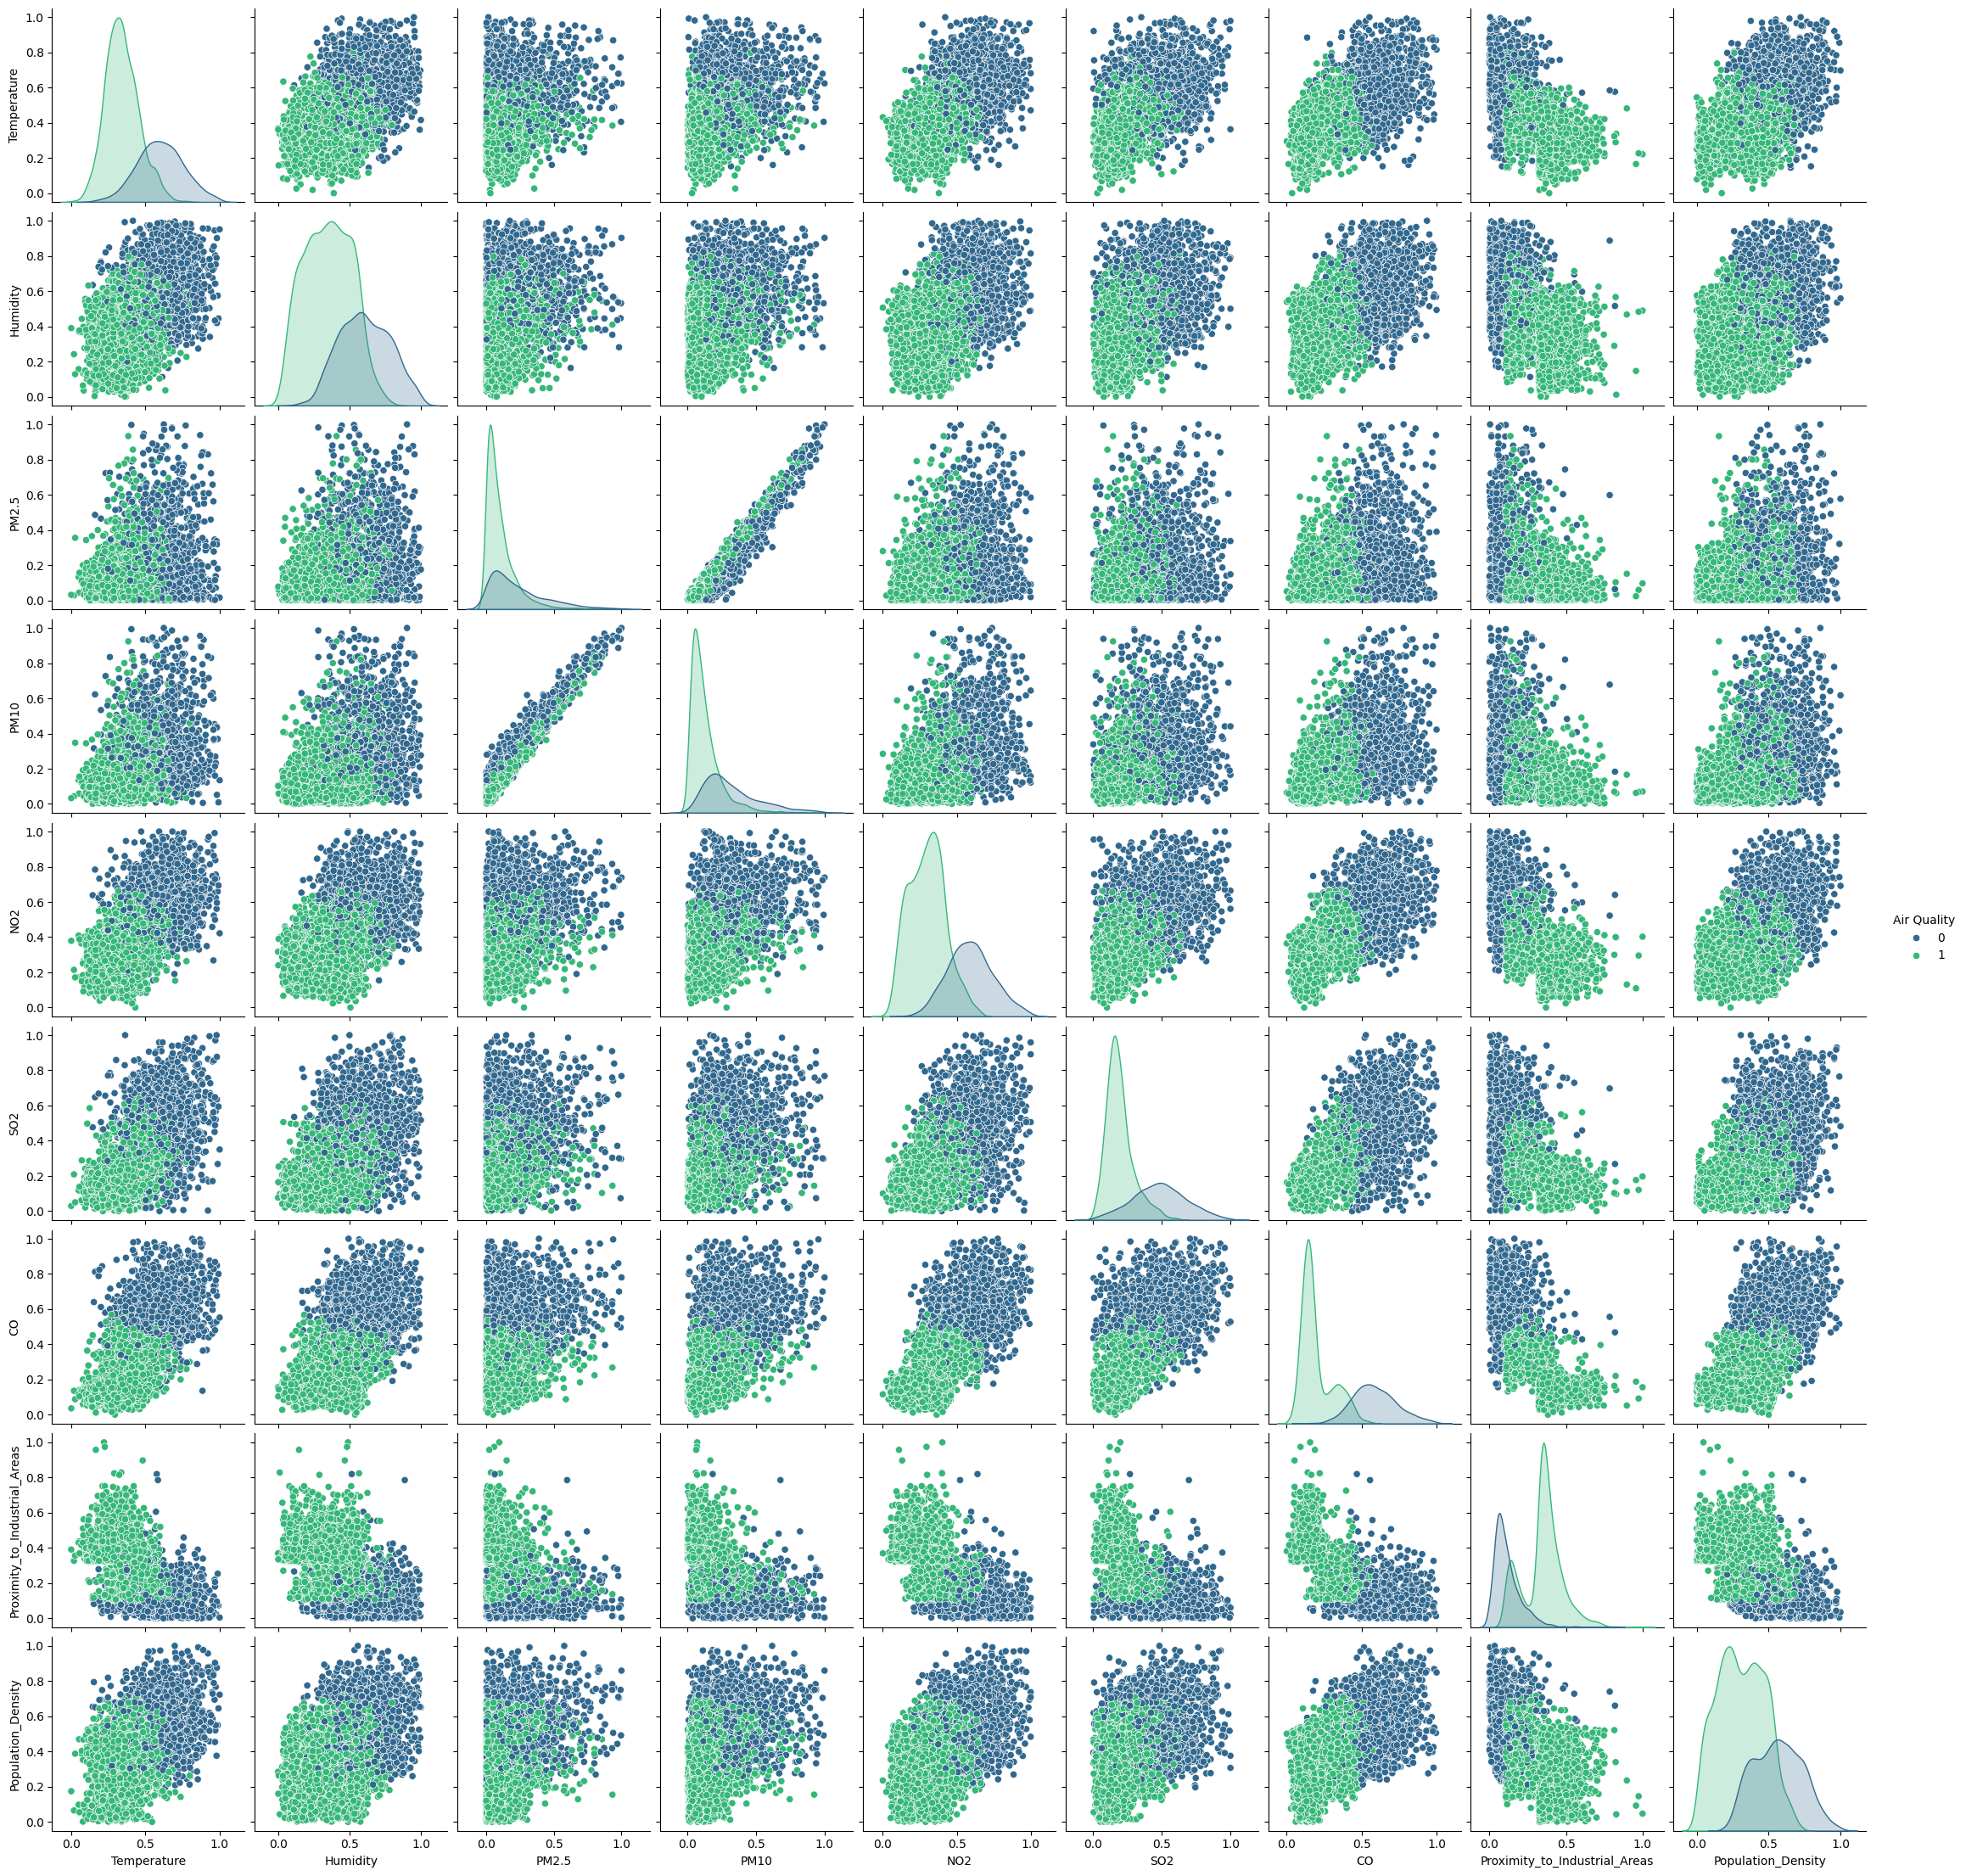

In [23]:
#Multivariate Analysis
#PairPlot to explore relationships between features
sns.pairplot(df, hue='Air Quality', palette='viridis')
plt.show()

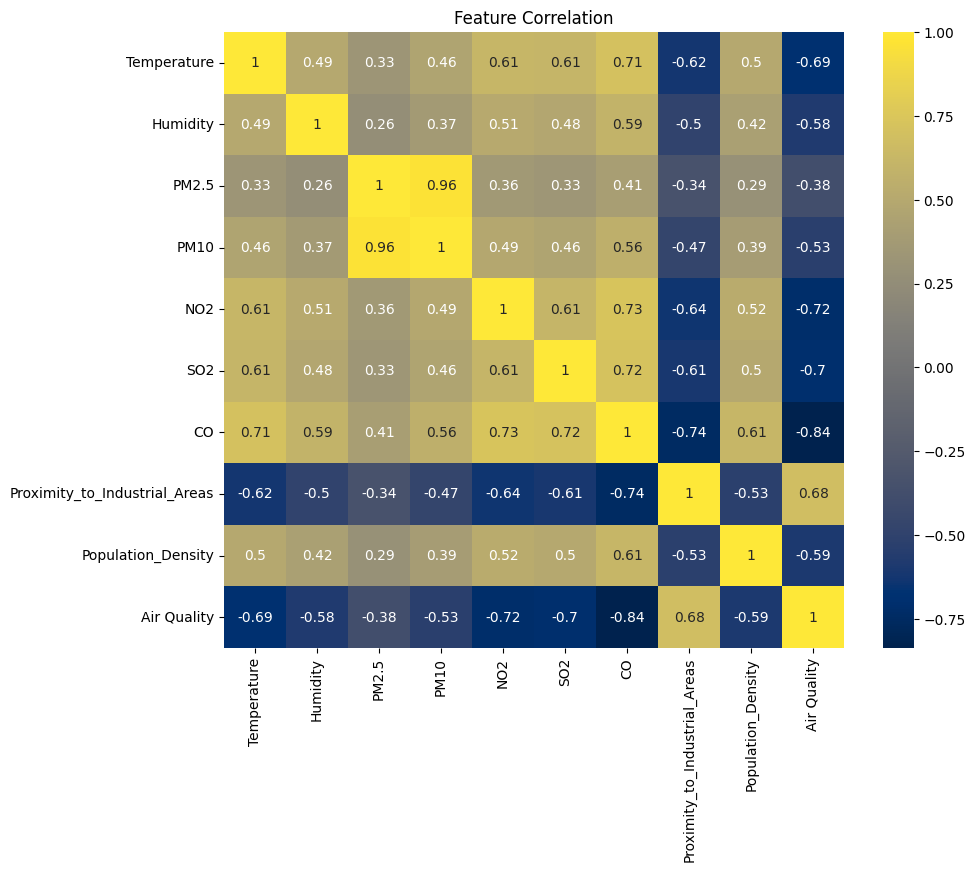

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='cividis')
plt.title('Feature Correlation')
plt.show()

In [25]:
df['Avg_Pollution'] = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].mean(axis=1)
df['Temp_Humidity_Interaction'] = df['Temperature'] * df['Humidity']

In [26]:
new_features = ['Avg_Pollution', 'Temp_Humidity_Interaction']
df[new_features].head()

Avg_Pollution  Temp_Humidity_Interaction
0       0.113066                   0.014629
1       0.155390                   0.156576
2       0.424006                   0.542711
3       0.291096                   0.453276
4       0.388300                   0.318545

In [27]:
features += new_features

In [28]:
df[features].head()

Temperature  Humidity     PM2.5      PM10       NO2       SO2     CO  \
0     0.360526  0.040576  0.048232  0.027653  0.130621  0.158824  0.200   
1     0.344737  0.454188  0.054662  0.100149  0.310493  0.167647  0.144   
2     0.684211  0.793194  0.116559  0.245889  0.760171  0.529412  0.468   
3     0.744737  0.608639  0.012862  0.098655  0.507495  0.376471  0.460   
4     0.421053  0.756545  0.081994  0.150224  0.807281  0.350000  0.552   

   Proximity_to_Industrial_Areas  Population_Density  Avg_Pollution  \
0                       0.369099            0.472042       0.113066   
1                       0.437768            0.149545       0.155390   
2                       0.025751            0.631990       0.424006   
3                       0.090129            0.711313       0.291096   
4                       0.124464            0.387516       0.388300   

   Temp_Humidity_Interaction  
0                   0.014629  
1                   0.156576  
2                   0.542711  
3                   0.453276  
4                   0.318545

In [29]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [30]:
X = df[features]
Y = df['Air Quality']

<Axes: >

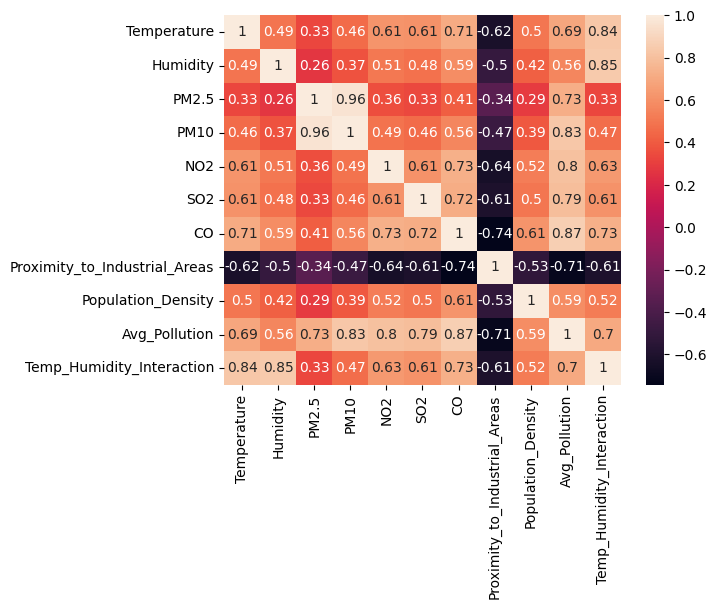

In [31]:
sns.heatmap(X.corr(), annot=True)

In [32]:
#Select top k features based on Chi-Squared statistic
k = 5
chi2_selector = SelectKBest(chi2, k=k)
x_chi2_selected = chi2_selector.fit_transform(X,Y)

In [33]:
chi2_support = chi2_selector.get_support()
selected_features_chi2 = [feature for feature, selected in zip(features, chi2_support) if selected]
print("The top K features selected: ", selected_features_chi2)

The top K features selected:  ['NO2', 'SO2', 'CO', 'Avg_Pollution', 'Temp_Humidity_Interaction']


In [34]:
mutual_info_selector = SelectKBest(mutual_info_classif, k=k)
X_mutual_info_selected = mutual_info_selector.fit_transform(X,Y)

In [35]:
mutual_info_support = mutual_info_selector.get_support()
selected_features_mutual_info = [feature for feature, selected in zip(features, mutual_info_support) if selected]

In [36]:
print("Top features selected using Mutual Information: ", selected_features_mutual_info)

Top features selected using Mutual Information:  ['NO2', 'CO', 'Proximity_to_Industrial_Areas', 'Avg_Pollution', 'Temp_Humidity_Interaction']


In [37]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier

Feature importances from Gradient Boosting:
CO                               0.646064
Avg_Pollution                    0.161715
Proximity_to_Industrial_Areas    0.101431
Temp_Humidity_Interaction        0.027039
NO2                              0.023753
SO2                              0.012537
Temperature                      0.010336
Population_Density               0.008116
Humidity                         0.007122
PM10                             0.001023
PM2.5                            0.000864
dtype: float64


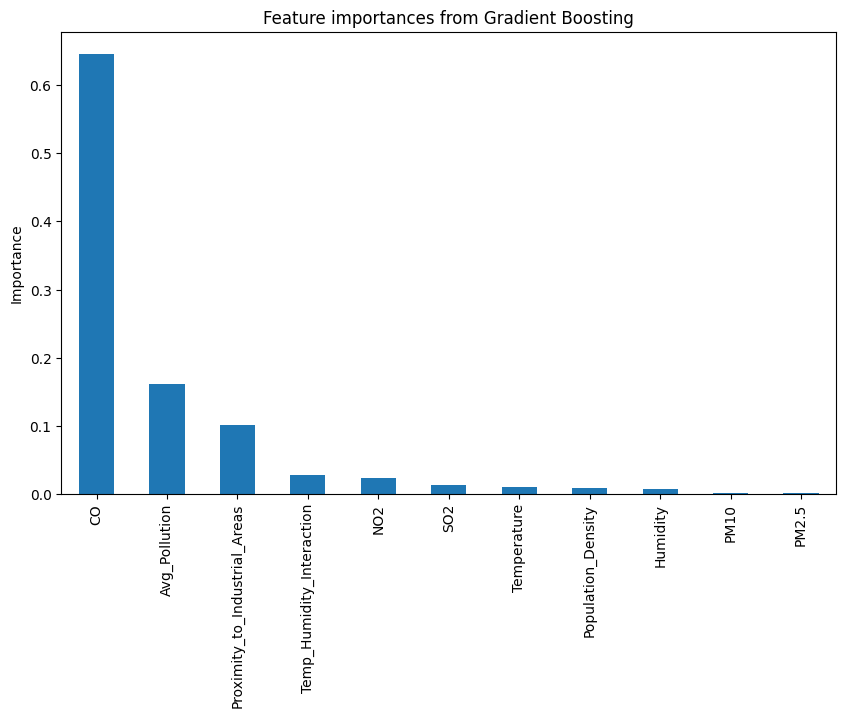

In [38]:
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(X,Y)

feature_importances = pd.Series(clf_gb.feature_importances_, 
                                index=features).sort_values(ascending=False)
print("Feature importances from Gradient Boosting:")
print(feature_importances)

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature importances from Gradient Boosting')
plt.ylabel('Importance')
plt.show()


Feature importances from Random Forest:
CO                               0.278966
Avg_Pollution                    0.226140
Temp_Humidity_Interaction        0.125722
Proximity_to_Industrial_Areas    0.117233
NO2                              0.084541
SO2                              0.054043
Temperature                      0.049317
Population_Density               0.025695
Humidity                         0.017855
PM2.5                            0.011501
PM10                             0.008987
dtype: float64


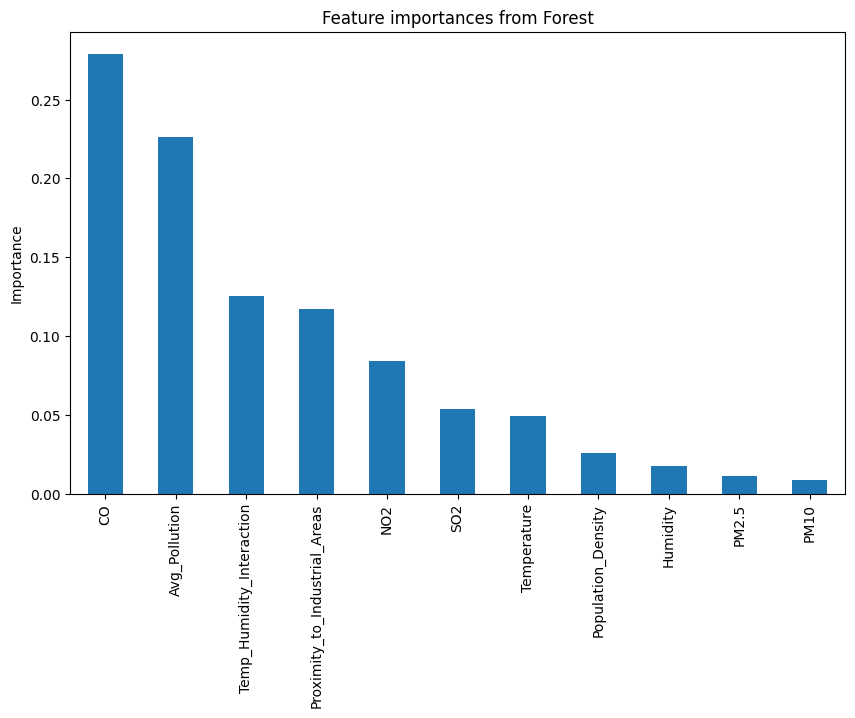

In [39]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X,Y)

feature_importances = pd.Series(clf_rf.feature_importances_, 
                                index=features).sort_values(ascending=False)
print("Feature importances from Random Forest:")
print(feature_importances)

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature importances from Forest')
plt.ylabel('Importance')
plt.show()

Feature importances from ExtraTreesClassifier Forest:
CO                               0.601215
Population_Density               0.134577
Temp_Humidity_Interaction        0.061357
Proximity_to_Industrial_Areas    0.047225
Avg_Pollution                    0.032774
NO2                              0.028479
Temperature                      0.027525
PM10                             0.022538
Humidity                         0.020902
SO2                              0.015341
PM2.5                            0.008067
dtype: float64


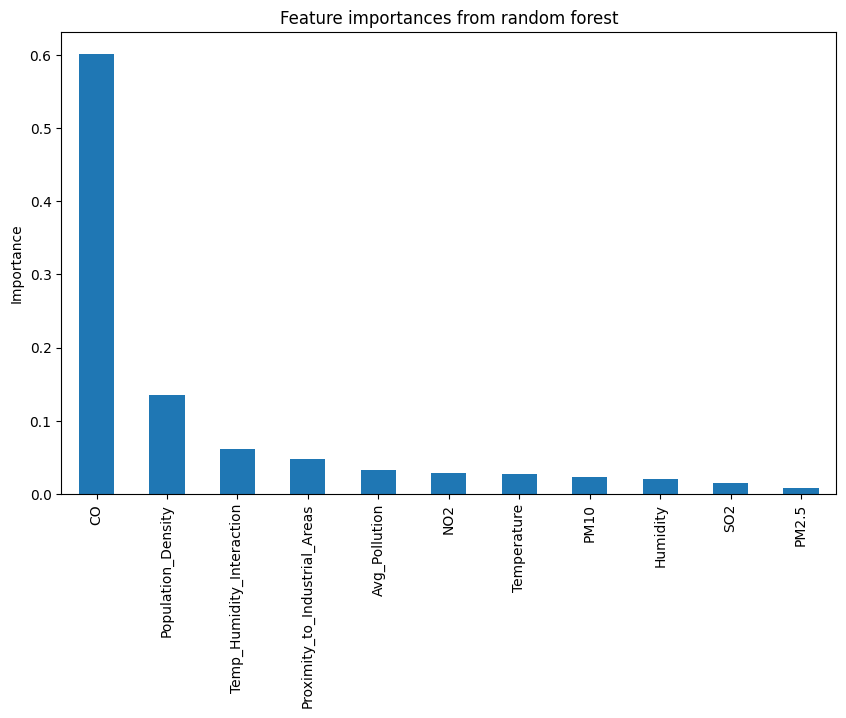

In [40]:
extraTreeClassifier = ExtraTreeClassifier(random_state=42)
extraTreeClassifier.fit(X,Y)

feature_importances = pd.Series(extraTreeClassifier.feature_importances_, 
                                index=features).sort_values(ascending=False)
print("Feature importances from ExtraTreesClassifier Forest:")
print(feature_importances)

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature importances from random forest')
plt.ylabel('Importance')
plt.show()

In [41]:
X = pd.DataFrame(x_chi2_selected, columns = selected_features_chi2)

In [42]:
X.head()

NO2       SO2     CO  Avg_Pollution  Temp_Humidity_Interaction
0  0.130621  0.158824  0.200       0.113066                   0.014629
1  0.310493  0.167647  0.144       0.155390                   0.156576
2  0.760171  0.529412  0.468       0.424006                   0.542711
3  0.507495  0.376471  0.460       0.291096                   0.453276
4  0.807281  0.350000  0.552       0.388300                   0.318545

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42, stratify = Y)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [46]:
rf_model = RandomForestClassifier(max_depth=5, random_state = 42)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [48]:
rf_predictions = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(Y_test, rf_predictions)
rf_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train))
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)
rf_class_report = classification_report(Y_test, rf_predictions)

In [49]:
print('Test accuracy: ', rf_test_accuracy)
print('Train Accuracy: ',rf_train_accuracy)
print('Confusion Matrix: \n', rf_conf_matrix)
print('Classification Report: \n', rf_class_report)

Test accuracy:  0.9603960396039604
Train Accuracy:  0.979269801980198
Confusion Matrix: 
 [[250  18]
 [ 14 526]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       268
           1       0.97      0.97      0.97       540

    accuracy                           0.96       808
   macro avg       0.96      0.95      0.96       808
weighted avg       0.96      0.96      0.96       808



In [50]:
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [51]:
lr_predictions = lr_model.predict(X_test)
lr_test_accuracy = accuracy_score(Y_test, lr_predictions)
lr_train_accuracy = accuracy_score(Y_train,lr_model.predict(X_train))
lr_conf_matrix = confusion_matrix(Y_test, lr_predictions)
lr_class_report = classification_report(Y_test, lr_predictions)

In [52]:
print('Test accuracy: ', lr_test_accuracy)
print('Train accuracy: ', lr_train_accuracy)
print('Confusion Matrix: \n', lr_conf_matrix)
print('Classification Report: \n', lr_class_report)

Test accuracy:  0.9653465346534653
Train accuracy:  0.9650371287128713
Confusion Matrix: 
 [[249  19]
 [  9 531]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       268
           1       0.97      0.98      0.97       540

    accuracy                           0.97       808
   macro avg       0.97      0.96      0.96       808
weighted avg       0.97      0.97      0.97       808



In [53]:
#Both models output the predicted probabilities using the predicted_proba() method.
rf_prob = rf_model.predict_proba(X_test)[:, 1]
lr_prob = lr_model.predict_proba(X_test)[:, 1]

In [54]:
#calculate the False positive rates and true positive rates
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_prob)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_prob)

In [55]:
#Calculate the AUC value
rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

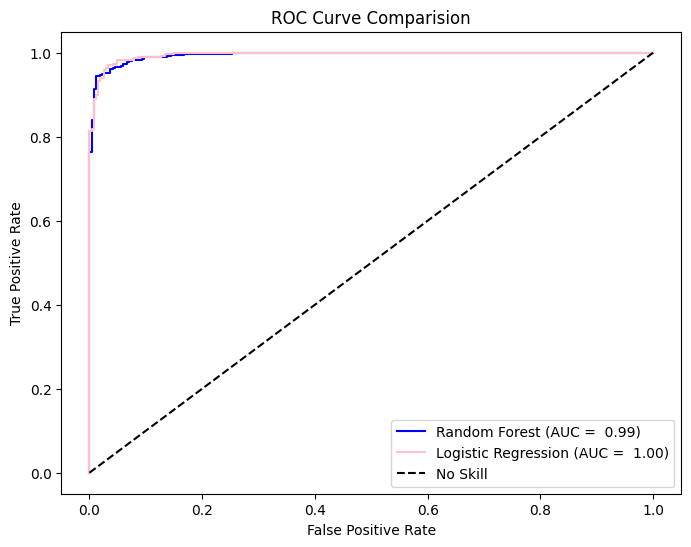

In [56]:
plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label = f"Random Forest (AUC = {rf_auc: .2f})", color = "blue")
plt.plot(lr_fpr, lr_tpr, label = f"Logistic Regression (AUC = {lr_auc: .2f})", color = "pink")
plt.plot([0,1], [0,1], 'k--', label = 'No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparision')
plt.legend()
plt.show()

In [57]:
#HyperParameter Tuning for Random forest
from sklearn.model_selection import GridSearchCV
param_grid ={
    'n_estimators': [100,200,300],
    'max_depth': [5,10,15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [58]:
grid_search = GridSearchCV(estimator= rf_model, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train,Y_train)
best_model=grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [59]:
best_model

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=300,
                       random_state=42)

In [60]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [61]:
#Evaluate best model
y_pred_best = grid_search.best_estimator_.predict(X_test)
best_test_accuracy = accuracy_score(Y_test, y_pred_best)
best_train_accuracy = accuracy_score(Y_train,grid_search.best_estimator_.predict(X_train))

In [62]:
print(f"Tuned Random forest Model Train Accuracy: {best_train_accuracy}")
print(f"Tuned Random forest Model Test Accuracy: {best_test_accuracy}")

Tuned Random forest Model Train Accuracy: 0.9777227722772277
Tuned Random forest Model Test Accuracy: 0.9628712871287128


In [63]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer

#Cross-Validation
k_folds = 5
scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(
    rf_model,
    X_train,
    Y_train,
    cv = k_folds,
    scoring=scoring,
    return_train_score=True
)

In [64]:
#This loop iterates over each metric in scoring and prints the mean and Standard deviation for both training and testing scores.
for metric in scoring:
   print(f"{metric.capitalize()} (Train): {cv_results['train_' + metric].mean():.2f} ± {cv_results['train_' + metric].std():.2f}")
   print(f"{metric.capitalize()} (Test): {cv_results['test_' + metric].mean():.2f} ± {cv_results['test_' + metric].std():.2f}")

Accuracy (Train): 0.98 ± 0.00
Accuracy (Test): 0.96 ± 0.01
Precision (Train): 0.98 ± 0.00
Precision (Test): 0.97 ± 0.01
Recall (Train): 0.99 ± 0.00
Recall (Test): 0.97 ± 0.01
F1 (Train): 0.99 ± 0.00
F1 (Test): 0.97 ± 0.01


In [65]:
train_accuracy = cv_results['train_accuracy'].mean()
test_accuracy = cv_results['test_accuracy'].mean()

In [66]:
train_accuracy

0.979966192008449

In [67]:
test_accuracy

0.9644230815241578

In [68]:
if train_accuracy > 0.9 and train_accuracy - test_accuracy > 0.1:
   print("The model is overfitting (High Variance).")
elif train_accuracy < 0.7:
   print("The model is underfitting (High Bias).")
else:
   print("The model has a good balance between bias and variance.")

The model has a good balance between bias and variance.


In [69]:
import pickle
with open('Air_Quality.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [70]:
# Load the model from the .pkl file
with open('Air_Quality.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [71]:
loaded_model

RandomForestClassifier(max_depth=5, random_state=42)